In [3]:
%load_ext autoreload
%autoreload 2


/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmpl7qfasxx.PNG'


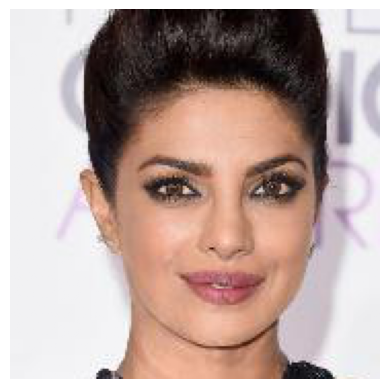

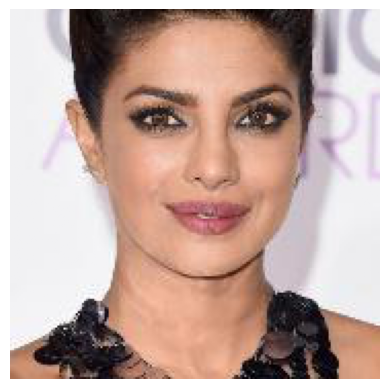

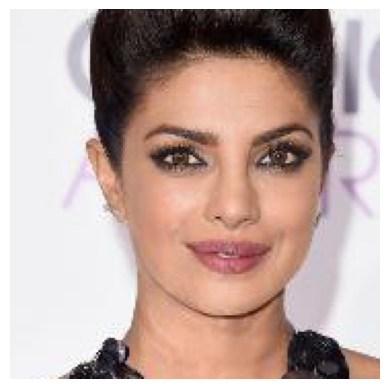

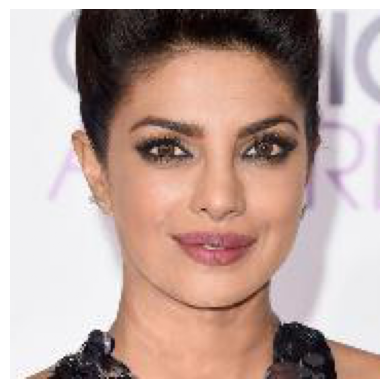

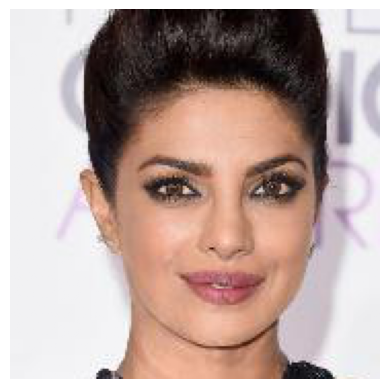

mask tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])


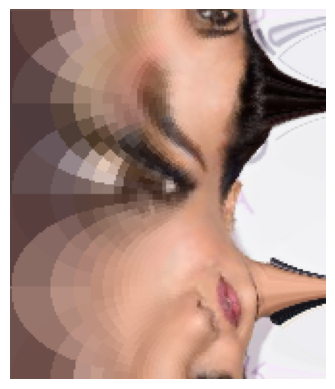

In [2]:
from transformations import get_pipeline
import yaml
from PIL import Image
from config import Config
import matplotlib.pyplot as plt

with open('config.yaml', 'r') as f:
    config = yaml.safe_load(f)
    configs_to_run = [Config(**c) for c in config['runs']]
image = Image.open('231.jpg')
image.show()

for run in configs_to_run:
    pipeline, _, _ = get_pipeline(run.transformations)

    transformed = pipeline(image)
    
    # Convert from [C, H, W] → [H, W, C] for matplotlib
    for t in transformed:
        img = t.permute(1, 2, 0)
        img = (img - img.min()) / (img.max() - img.min())
        plt.imshow(img)
        plt.axis('off')
        plt.show()
